                    ### Optimization marketing expenses for Yandex.Afisha. 

### Project description

You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.

You have:

Server logs with data on Yandex.Afisha visits from June 2017 through May 2018

Dump file with all orders for the period

Marketing expenses statistics

You are going to study:

How people use the product

When they start to buy

How much money each customer brings

When they pay off 

## Description of the data

The visitstable (server logs with data on website visits):

Uid — user's unique identifier

Device — user's device

Start Ts — session start date and time

End Ts — session end date and time

Source Id — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The orderstable (data on orders):

Uid — unique identifier of the user making an order

Buy Ts — order date and time

Revenue — Yandex.Afisha's revenue from the order

The coststable (data on marketing expenses):

source_ id — ad source identifier

dt — date

costs — expenses on this ad source on this day

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    visits= pd.read_csv('/datasets/visits_log_us.csv') 
except:
    visits= pd.read_csv('C:/Projects/datasets/visits_log_us.csv')
    
try:    
    orders=pd.read_csv('/datasets/orders_log_us.csv')
except:
    orders=pd.read_csv('C:/Projects/datasets/orders_log_us.csv')
    
try:     
    costs= pd.read_csv('/datasets/costs_us.csv')
except:
    costs= pd.read_csv('C:/Projects/datasets/costs_us.csv')

   We have 3 datasets that contain information about visits, orders and costs. As we see, there are no missing values in our data. Columns with dates have wrong data types and should be changed. 

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [6]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

   Visits and costs datasets have the same column with information about the source of marketing but with different spelling. Let's change it to make possible to use for our future analysis.

In [7]:
visits.columns=('Device', 'End Ts', 'source_id', 'Start Ts', 'Uid')
visits.head()

,Device,End Ts,source_id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Let's check our dataset's for duplicates.

In [8]:
visits.duplicated().sum()

0

In [9]:
orders.duplicated().sum()

0

In [10]:
costs.duplicated().sum()

0

 There are no duplicates in our databases. 
 
 Let's study our data deeper.

In [11]:
#what values we have in device_type
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

In [12]:
#whether the data corresponds to the time interval specified in the task
visits['Start Ts'].sort_values()

308527    2017-06-01 00:01:00
260646    2017-06-01 00:02:00
245715    2017-06-01 00:02:00
235930    2017-06-01 00:04:00
11727     2017-06-01 00:09:00
                 ...         
299620    2018-05-31 23:59:00
198329    2018-05-31 23:59:00
269213    2018-05-31 23:59:00
294423    2018-05-31 23:59:00
263781    2018-05-31 23:59:00
Name: Start Ts, Length: 359400, dtype: object

In [13]:
#find out what traffic sources we have and how visitors are distributed among them.
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

   We have information about what type of device was used during the visit. It is desktop or touch. 
   
   The data corresponds to the time interval specified in the task from June 2017 till May 2018.
   
   Clients came from 9 sources. The most popular sources are 4th and 3rd.

#### How many people use it every day, week, and month?

We should change data types and group the data to calculate how many people use it every day, week, and month. As we did below.

In [14]:
visits['start_date']=visits['Start Ts'].astype('datetime64[D]')
visits['end_date']=visits['End Ts'].astype('datetime64[D]')
visits['week']=visits['Start Ts'].astype('datetime64[W]')
visits['month']=visits['Start Ts'].astype('datetime64[M]')

In [15]:
dau=visits.groupby('start_date')['Uid'].nunique().reset_index()
dau.head()

,start_date,Uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


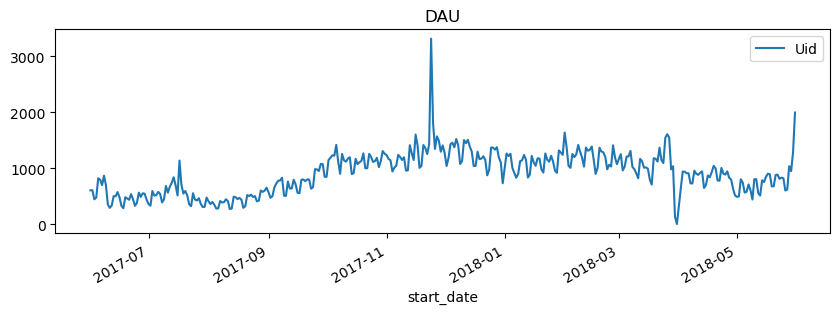

In [16]:
dau.plot(x="start_date", y="Uid", title='DAU',figsize=(10,3))
plt.show()

In [17]:
wau=visits.groupby('week')['Uid'].nunique().reset_index()
wau.head()

,week,Uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


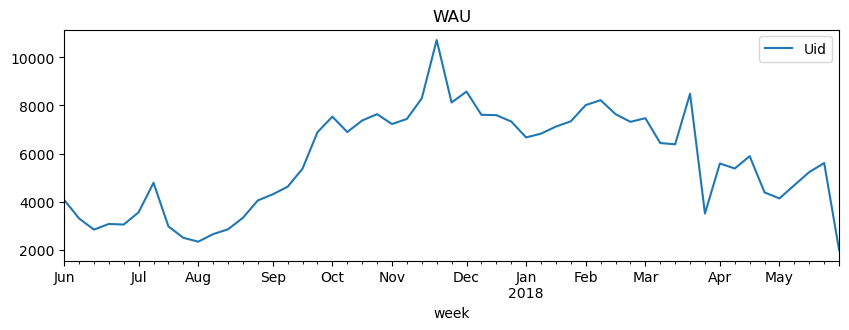

In [18]:
wau.plot(x="week", y="Uid", title='WAU',figsize=(10,3))
plt.show()

In [19]:
mau=visits.groupby('month')['Uid'].nunique().reset_index()
mau.head()

,month,Uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692


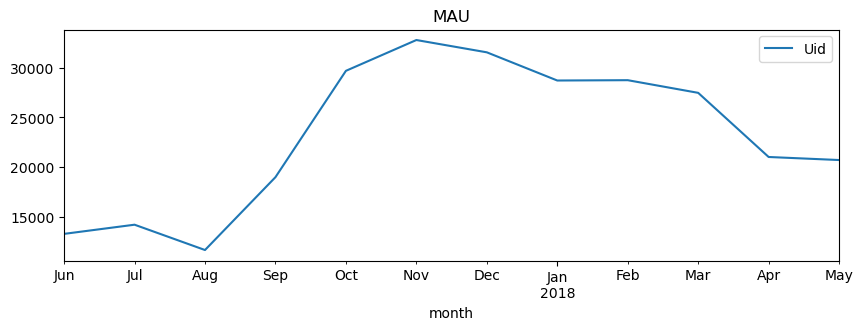

In [20]:
mau.plot(x="month", y="Uid", title='MAU',figsize=(10,3))
plt.show()

   The lowest activity was in summer, from August we can see some increase with the peak in November. From December to May the number of visits decreased.
   
   Let's check the number of sessions per day.

In [21]:
#How many sessions are there per day? (One user might have more than one session.)
session_per_day= visits.groupby('start_date')['Uid'].count().reset_index()
session_per_day.columns=['start_date', 'session_per_day']
session_per_day.head()

,start_date,session_per_day
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


In [22]:
sessions=dau.merge(session_per_day, how='left', on=['start_date'])
sessions

,start_date,Uid,session_per_day
0,2017-06-01,605,664
1,2017-06-02,608,658
2,2017-06-03,445,477
3,2017-06-04,476,510
4,2017-06-05,820,893
...,...,...,...
359,2018-05-27,620,672
360,2018-05-28,1039,1156
361,2018-05-29,948,1035
362,2018-05-30,1289,1410


In [23]:
sessions['per_day']=sessions['session_per_day']/sessions['Uid']
sessions

,start_date,Uid,session_per_day,per_day
0,2017-06-01,605,664,1.097521
1,2017-06-02,608,658,1.082237
2,2017-06-03,445,477,1.071910
3,2017-06-04,476,510,1.071429
4,2017-06-05,820,893,1.089024
...,...,...,...,...
359,2018-05-27,620,672,1.083871
360,2018-05-28,1039,1156,1.112608
361,2018-05-29,948,1035,1.091772
362,2018-05-30,1289,1410,1.093871


As we see from the table above, average user does a little bit more than one session per day.

#### What is the length of each session?

Let's look at column length. We found two negative values here, we should drop them. There is large spread of values so it's better to focus on the median to estimate the average length of the session. 

In [24]:
visits['length']=((pd.to_datetime(visits['End Ts'])-pd.to_datetime(visits['Start Ts']))/np.timedelta64(1,'m')).round().astype('int')
visits['length'].describe()

count    359400.000000
mean         10.716330
std          16.619282
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: length, dtype: float64

In [25]:
visits=visits[visits['length']>=0]
visits['length'].describe()

count    359398.000000
mean         10.716607
std          16.618906
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: length, dtype: float64

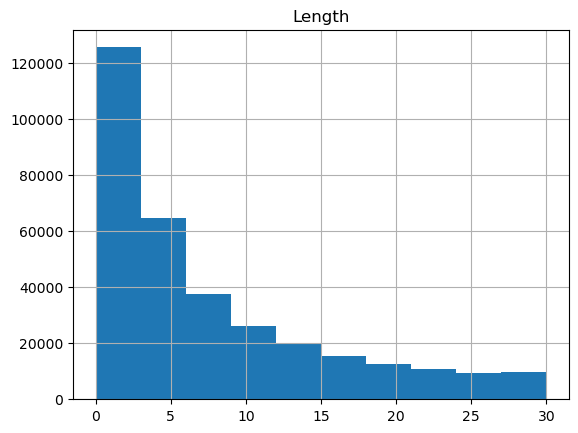

In [26]:
plt.title('Length')
visits['length'].hist(range=(0,30))
plt.show()


The average length of visit is 5 minutes. The majority of users spent 2-14 minutes per session.

##### What's the user retention rate?

Let's study user retention rate.

In [27]:
min_visit=visits.groupby(['Uid'])['start_date'].min().reset_index()
min_visit.columns=['Uid', 'first_session']
min_visit.head()

,Uid,first_session
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [28]:
visits=visits.merge(min_visit, how='inner', on=['Uid'])
visits.head()

,Device,End Ts,source_id,Start Ts,Uid,start_date,end_date,week,month,length,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20,2017-12-14,2017-12-01,18,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-15,2018-02-01,28,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-20,2018-05-17,2018-05-01,24,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-09,2018-03-08,2018-03-01,28,2018-03-09


In [29]:
visits['cohort']=visits['first_session'].astype('datetime64[M]')
visits['age']=((pd.to_datetime(visits['Start Ts']).astype('datetime64[M]') -visits['cohort'])/np.timedelta64(1,'M')).round().astype('int')
display(visits)

,Device,End Ts,source_id,Start Ts,Uid,start_date,end_date,week,month,length,first_session,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20,2017-12-14,2017-12-01,18,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-15,2018-02-01,28,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-20,2018-05-17,2018-05-01,24,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-09,2018-03-08,2018-03-01,28,2018-03-09,2018-03-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,2018-04-23,2018-04-19,2018-04-01,8,2018-04-23,2018-04-01,0
359394,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,2017-11-08,2017-11-02,2017-11-01,0,2017-11-08,2017-11-01,0
359395,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31,2017-07-31,2017-07-27,2017-07-01,18,2017-07-31,2017-07-01,0
359396,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20,2018-03-20,2018-03-15,2018-03-01,14,2018-03-20,2018-03-01,0


In [30]:
cohorts=visits.pivot_table(index='cohort', columns='age', values= 'Uid', aggfunc='nunique').fillna(0)
cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,0.0
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,0.0,0.0
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,0.0,0.0,0.0
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,0.0,0.0,0.0,0.0
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,22197.0,1267.0,565.0,446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,0.000000
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,0.000000,0.000000
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,0.000000,0.000000,0.000000
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.057080,0.025454,0.020093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Retention rate is decreasing. The table below shows us that users from the eldest cohorts are more loyal than users from the youngest cohorts. It's also true for their age distribution.

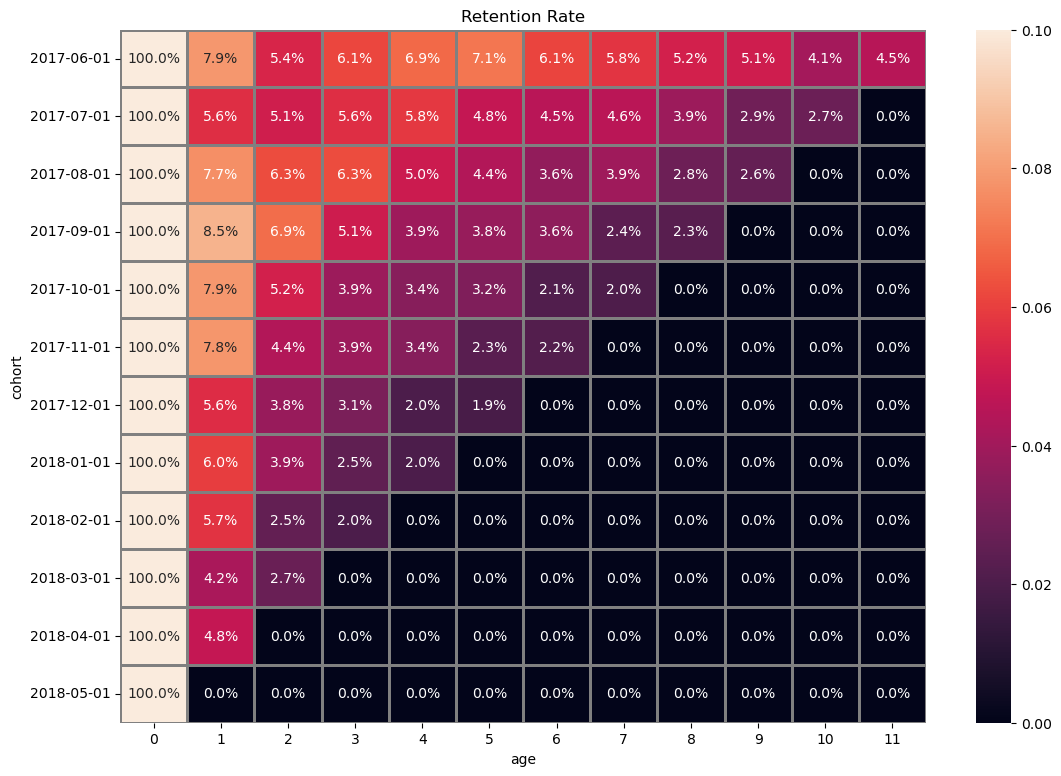

In [32]:
retention.index=retention.index.astype(str)
plt.figure(figsize=(13,9))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1, cbar_kws=None).set(title='Retention Rate')
plt.show()

#### Conversion

Let's calculate the conversion

In [33]:
orders['purchase_day']=orders['Buy Ts'].astype('datetime64[D]')
orders.head()

,Buy Ts,Revenue,Uid,purchase_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [34]:
min_order=orders.groupby(['Uid'])['purchase_day'].min().reset_index()
min_order.columns=['Uid', 'first_purchase']
min_order.head()

,Uid,first_purchase
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [35]:
purchase=min_visit.merge(min_order, how='inner', on=['Uid'])
purchase.head()

,Uid,first_session,first_purchase
0,313578113262317,2017-09-18,2018-01-03
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-27,2018-01-28
4,2551852515556206,2017-11-24,2017-11-24


In [36]:
purchase['conversion_time']=((pd.to_datetime(purchase['first_purchase'])-pd.to_datetime(purchase['first_session']))/np.timedelta64(1,'D')).round().astype('int')

purchase.head()

,Uid,first_session,first_purchase,conversion_time
0,313578113262317,2017-09-18,2018-01-03,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-27,2018-01-28,1
4,2551852515556206,2017-11-24,2017-11-24,0


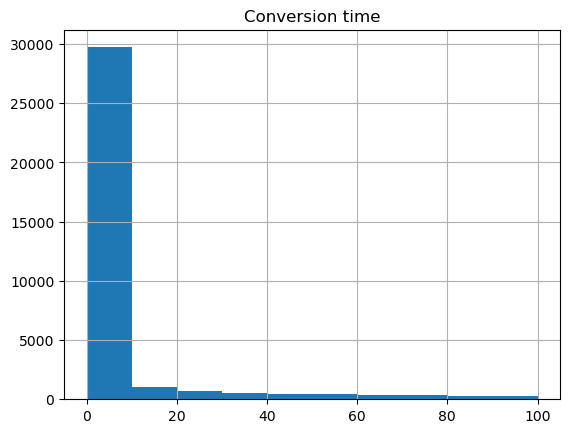

In [37]:
plt.title('Conversion time')
purchase['conversion_time'].hist(range=(0,100))
plt.show()

The average client of Yandex.Afisha buys something on the web site on the day of registration. It takes 2 days to make a purchase for 75% of users. Quite a good result!

In [38]:
purchase['conversion_time'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_time, dtype: float64

In [39]:
purchase

,Uid,first_session,first_purchase,conversion_time
0,313578113262317,2017-09-18,2018-01-03,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-27,2018-01-28,1
4,2551852515556206,2017-11-24,2017-11-24,0
...,...,...,...,...
36518,18445147675727495770,2017-08-20,2017-11-24,96
36519,18445407535914413204,2017-09-22,2017-09-22,0
36520,18445601152732270159,2017-08-07,2018-03-26,231
36521,18446156210226471712,2017-11-07,2018-02-18,103


Conversion of the site is 16%. It's not so high.

In [40]:
print(purchase['Uid'].nunique()/visits['Uid'].nunique())

0.16006994815246595


In [41]:
purchase['cohort']=purchase['first_session'].astype('datetime64[M]')
purchase['age']=((pd.to_datetime(purchase['first_purchase'])-pd.to_datetime(purchase['first_session']))/np.timedelta64(1,'M')).round().astype('int')
display(purchase)

,Uid,first_session,first_purchase,conversion_time,cohort,age
0,313578113262317,2017-09-18,2018-01-03,107,2017-09-01,4
1,1575281904278712,2017-06-03,2017-06-03,0,2017-06-01,0
2,2429014661409475,2017-10-11,2017-10-11,0,2017-10-01,0
3,2464366381792757,2018-01-27,2018-01-28,1,2018-01-01,0
4,2551852515556206,2017-11-24,2017-11-24,0,2017-11-01,0
...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20,2017-11-24,96,2017-08-01,3
36519,18445407535914413204,2017-09-22,2017-09-22,0,2017-09-01,0
36520,18445601152732270159,2017-08-07,2018-03-26,231,2017-08-01,8
36521,18446156210226471712,2017-11-07,2018-02-18,103,2017-11-01,3


In [42]:
#How many orders do they make during a given period of time?
cohorts_purchase=purchase.pivot_table(index='cohort', columns='age', values= 'Uid', aggfunc='count').fillna(0)
cohorts_purchase

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06-01,2034.0,147.0,80.0,97.0,120.0,87.0,84.0,62.0,65.0,60.0,29.0,45.0,13.0
2017-07-01,1755.0,91.0,109.0,84.0,87.0,81.0,66.0,65.0,50.0,31.0,27.0,12.0,0.0
2017-08-01,1230.0,103.0,86.0,76.0,60.0,38.0,43.0,33.0,25.0,20.0,7.0,0.0,0.0
2017-09-01,2311.0,213.0,153.0,84.0,65.0,82.0,69.0,39.0,39.0,3.0,0.0,0.0,0.0
2017-10-01,3796.0,285.0,187.0,111.0,106.0,85.0,49.0,54.0,5.0,0.0,0.0,0.0,0.0
2017-11-01,3451.0,301.0,157.0,117.0,103.0,67.0,58.0,8.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,3490.0,220.0,143.0,94.0,57.0,53.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,2699.0,197.0,109.0,56.0,50.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,2897.0,152.0,67.0,59.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cohort analysis shows us that the main amount of purchases were made in the first month of registration. That is true for all cohorts. In the second month from the registration clients return to make purchases less frequently and the further the less purchases are among all cohorts. 

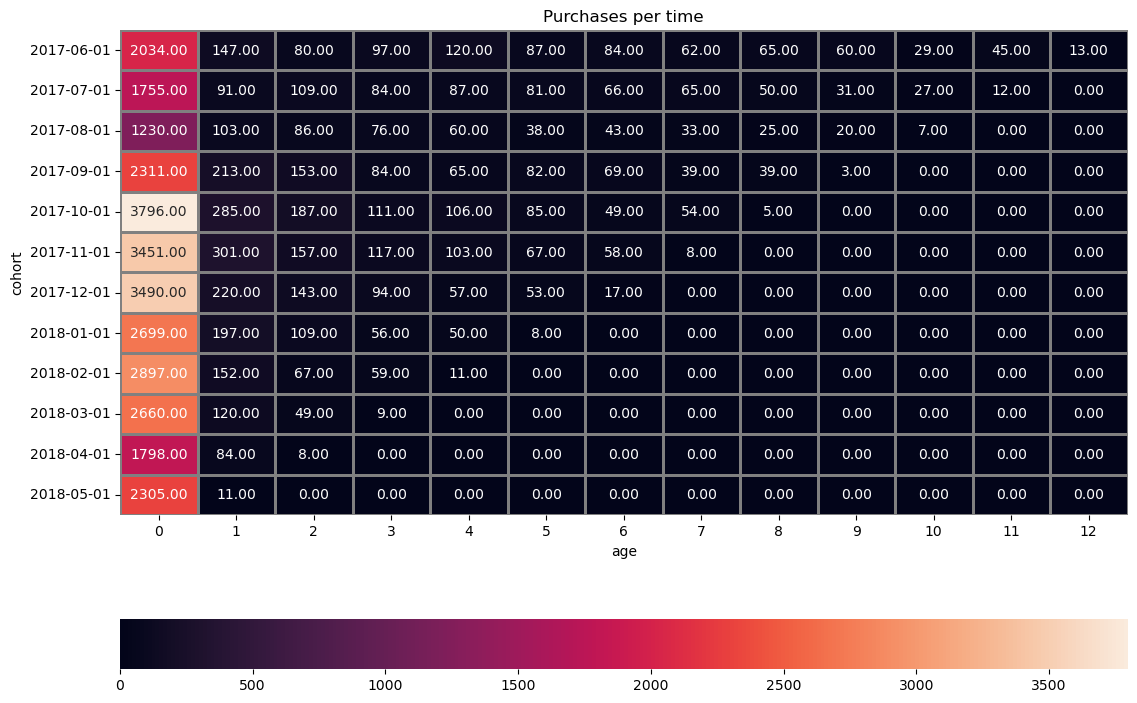

In [43]:
cohorts_purchase.index=cohorts_purchase.index.astype(str)
plt.figure(figsize=(13,9))
sns.heatmap(cohorts_purchase, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='Purchases per time')
plt.show()

In [44]:
orders

,Buy Ts,Revenue,Uid,purchase_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31


In [45]:
#Let's make it another way to find number of orders per user
orders['purchase_month']=orders['Buy Ts'].astype('datetime64[M]')
min_orders=orders.groupby(['Uid'])['purchase_month'].min().reset_index()
min_orders.columns=['Uid', 'first_purchase_month']

min_orders.head()

,Uid,first_purchase_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [46]:
min_orders['first_purchase_month']=min_orders['first_purchase_month'].astype('datetime64[M]')

In [47]:
orders=orders.merge(min_orders, how='left', on='Uid')
orders

,Buy Ts,Revenue,Uid,purchase_day,purchase_month,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2018-05-01


In [48]:
purchases_per_month=orders.groupby(['first_purchase_month', 'purchase_month'])['Revenue'].count().reset_index()
purchases_per_month.columns=('first_purchase_month', 'purchase_month','number_of_orders')
purchases_per_month

,first_purchase_month,purchase_month,number_of_orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195
77,2018-05-01,2018-05-01,3249


In [49]:
n_cohort=orders.groupby('first_purchase_month')['Uid'].nunique().reset_index()
n_cohort.columns=('first_purchase_month', 'size_of_cohort')
n_cohort

,first_purchase_month,size_of_cohort
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [50]:
final_table=purchases_per_month.merge(n_cohort, how='left', on='first_purchase_month')

In [51]:
final_table['avg_number_of_orders']=final_table['number_of_orders']/final_table['size_of_cohort']

In [52]:
final_table['lifetime']=((pd.to_datetime(final_table['purchase_month'])-pd.to_datetime(final_table['first_purchase_month']))/np.timedelta64(1,'M')).round().astype('int')
final_table

,first_purchase_month,purchase_month,number_of_orders,size_of_cohort,avg_number_of_orders,lifetime
0,2017-06-01,2017-06-01,2354,2023,1.163618,0
1,2017-06-01,2017-07-01,177,2023,0.087494,1
2,2017-06-01,2017-08-01,174,2023,0.086011,2
3,2017-06-01,2017-09-01,226,2023,0.111715,3
4,2017-06-01,2017-10-01,292,2023,0.144340,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,3533,0.049816,2
75,2018-04-01,2018-04-01,2495,2276,1.096221,0
76,2018-04-01,2018-05-01,195,2276,0.085677,1
77,2018-05-01,2018-05-01,3249,2988,1.087349,0


In [53]:
ord_per_us=final_table.pivot_table(index='first_purchase_month', columns='lifetime', values= 'avg_number_of_orders', aggfunc='sum').cumsum(axis=1)
ord_per_us

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,NaN
2017-08-01,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,NaN,NaN
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,NaN,NaN,NaN
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.182416,1.205149,1.224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


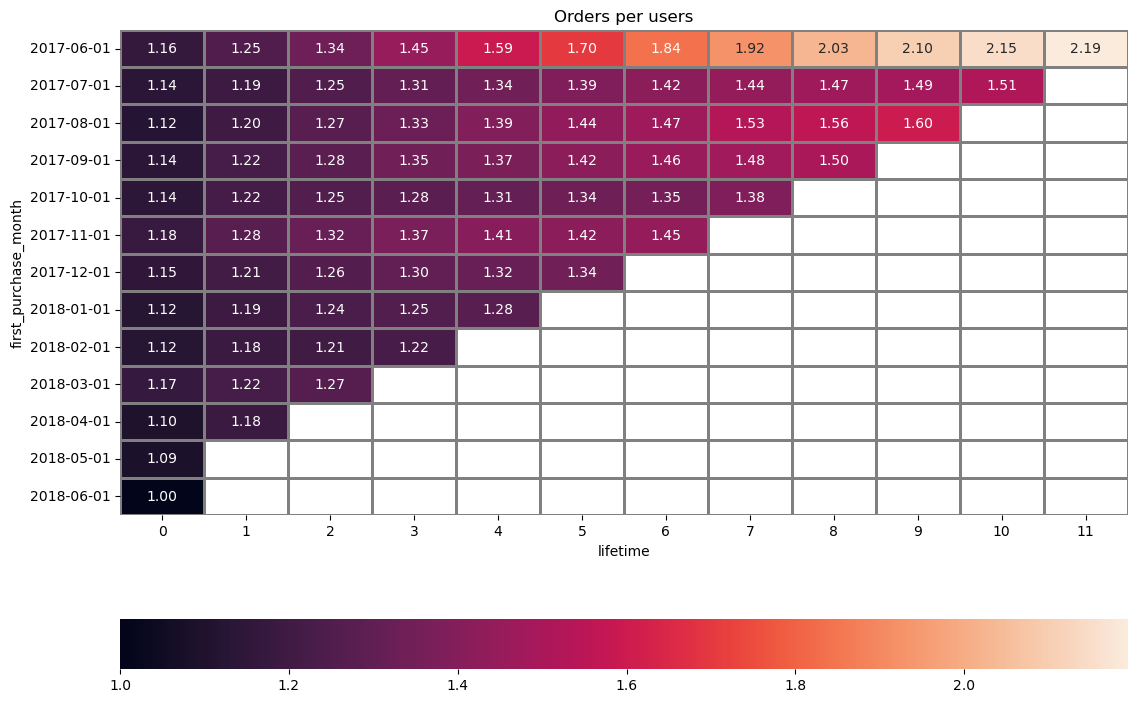

In [54]:
ord_per_us.index=ord_per_us.index.astype(str)
plt.figure(figsize=(13,9))
sns.heatmap(ord_per_us, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='Orders per users')
plt.show()

In [55]:
#What is the average purchase size?
purchase_new=purchase.merge(orders, how='inner', on=['Uid'])
purchase_new

,Uid,first_session,first_purchase,conversion_time,cohort,age,Buy Ts,Revenue,purchase_day,purchase_month,first_purchase_month
0,313578113262317,2017-09-18,2018-01-03,107,2017-09-01,4,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03,2017-06-03,0,2017-06-01,0,2017-06-03 10:13:00,1.22,2017-06-03,2017-06-01,2017-06-01
2,1575281904278712,2017-06-03,2017-06-03,0,2017-06-01,0,2017-06-03 17:39:00,1.83,2017-06-03,2017-06-01,2017-06-01
3,2429014661409475,2017-10-11,2017-10-11,0,2017-10-01,0,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-01,2017-10-01
4,2464366381792757,2018-01-27,2018-01-28,1,2018-01-01,0,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22,2017-09-22,0,2017-09-01,0,2017-09-24 23:48:00,0.24,2017-09-24,2017-09-01,2017-09-01
50411,18445407535914413204,2017-09-22,2017-09-22,0,2017-09-01,0,2017-09-25 15:56:00,0.12,2017-09-25,2017-09-01,2017-09-01
50412,18445601152732270159,2017-08-07,2018-03-26,231,2017-08-01,8,2018-03-26 22:54:00,4.22,2018-03-26,2018-03-01,2018-03-01
50413,18446156210226471712,2017-11-07,2018-02-18,103,2017-11-01,3,2018-02-18 19:34:00,9.78,2018-02-18,2018-02-01,2018-02-01


In [56]:
# calculating average check for each order and plotting it
avg_check=purchase_new.groupby(['Uid'])['Revenue'].median().reset_index()
avg_check.describe()


,Uid,Revenue
count,3.652300e+04,36523.000000
mean,9.213152e+18,4.041776
std,5.324792e+18,7.506535
min,3.135781e+14,0.000000
25%,4.615081e+18,1.280000
50%,9.245161e+18,2.440000
75%,1.383709e+19,4.890000
max,1.844617e+19,646.555000


The main part of clients spend 1.3-4.9% for one purchase. There are extremely high purchases, so we prefer to use the median for calculating the average check which is 2.4$.

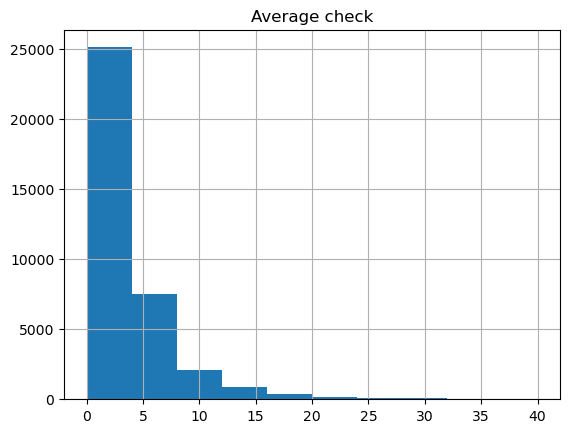

In [57]:
plt.title('Average check')
avg_check['Revenue'].hist(range=(0,40))
plt.show()

In [58]:
#Average revenue per check
grouping=orders.groupby(['first_purchase_month', 'purchase_month'])['Revenue'].mean().reset_index()
grouping.columns=('first_purchase_month', 'purchase_month','avg_check')
grouping

,first_purchase_month,purchase_month,avg_check
0,2017-06-01,2017-06-01,4.060106
1,2017-06-01,2017-07-01,5.547006
2,2017-06-01,2017-08-01,5.088161
3,2017-06-01,2017-09-01,8.545575
4,2017-06-01,2017-10-01,7.084178
...,...,...,...
74,2018-03-01,2018-05-01,6.334489
75,2018-04-01,2018-04-01,4.248774
76,2018-04-01,2018-05-01,6.204718
77,2018-05-01,2018-05-01,4.286168


In [59]:
grouping['age']=((pd.to_datetime(final_table['purchase_month'])-pd.to_datetime(final_table['first_purchase_month']))/np.timedelta64(1,'M')).round().astype('int')
grouping

,first_purchase_month,purchase_month,avg_check,age
0,2017-06-01,2017-06-01,4.060106,0
1,2017-06-01,2017-07-01,5.547006,1
2,2017-06-01,2017-08-01,5.088161,2
3,2017-06-01,2017-09-01,8.545575,3
4,2017-06-01,2017-10-01,7.084178,4
...,...,...,...,...
74,2018-03-01,2018-05-01,6.334489,2
75,2018-04-01,2018-04-01,4.248774,0
76,2018-04-01,2018-05-01,6.204718,1
77,2018-05-01,2018-05-01,4.286168,0


In [60]:
grouping['first_purchase_month'] = grouping['first_purchase_month'].dt.strftime('%Y-%m')

In [61]:
avg_revenue_per_check=grouping.pivot_table(index='first_purchase_month', columns='age', values= 'avg_check', aggfunc='mean').fillna(0)
avg_revenue_per_check

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093
2017-07,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,0.000000
2017-08,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,0.000000,0.000000
2017-09,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,0.000000,0.000000,0.000000
2017-10,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,0.000000,0.000000,0.000000,0.000000
2017-11,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01,3.687417,4.438482,6.454969,7.524844,2.711282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02,3.706266,4.576486,3.453735,3.867143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


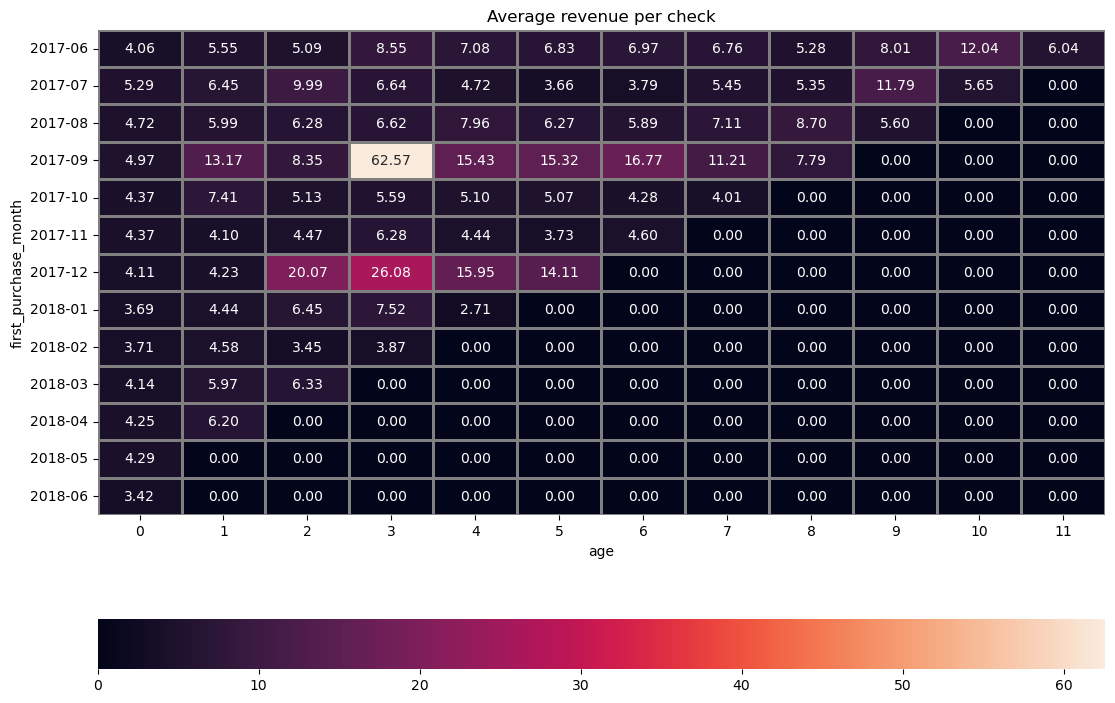

In [62]:
avg_revenue_per_check.index=avg_revenue_per_check.index.astype(str)
plt.figure(figsize=(13,9))
sns.heatmap(avg_revenue_per_check, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title ='Average revenue per check')
plt.show()

September brings more money to Yandex.Afisha than other monthes. Especially from September cohort.

In [63]:
purchase_new

,Uid,first_session,first_purchase,conversion_time,cohort,age,Buy Ts,Revenue,purchase_day,purchase_month,first_purchase_month
0,313578113262317,2017-09-18,2018-01-03,107,2017-09-01,4,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03,2017-06-03,0,2017-06-01,0,2017-06-03 10:13:00,1.22,2017-06-03,2017-06-01,2017-06-01
2,1575281904278712,2017-06-03,2017-06-03,0,2017-06-01,0,2017-06-03 17:39:00,1.83,2017-06-03,2017-06-01,2017-06-01
3,2429014661409475,2017-10-11,2017-10-11,0,2017-10-01,0,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-01,2017-10-01
4,2464366381792757,2018-01-27,2018-01-28,1,2018-01-01,0,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22,2017-09-22,0,2017-09-01,0,2017-09-24 23:48:00,0.24,2017-09-24,2017-09-01,2017-09-01
50411,18445407535914413204,2017-09-22,2017-09-22,0,2017-09-01,0,2017-09-25 15:56:00,0.12,2017-09-25,2017-09-01,2017-09-01
50412,18445601152732270159,2017-08-07,2018-03-26,231,2017-08-01,8,2018-03-26 22:54:00,4.22,2018-03-26,2018-03-01,2018-03-01
50413,18446156210226471712,2017-11-07,2018-02-18,103,2017-11-01,3,2018-02-18 19:34:00,9.78,2018-02-18,2018-02-01,2018-02-01


Let's check how much money does each cohort bring.

In [64]:
#How much money does each cohort bring?
purchase_new['first_order_month']=purchase_new['first_purchase'].astype('datetime64[M]')
purchase_new['month']=purchase_new['Buy Ts'].astype('datetime64[M]')

In [65]:
cohort_sizes= purchase_new.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
cohort_sizes.head()

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [66]:
ltv_cohort=purchase_new.groupby(['first_order_month','month'])['Revenue'].sum().reset_index()
ltv_cohort

,first_order_month,month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [67]:
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort

,first_order_month,month,Revenue,cohort_size
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,2276
77,2018-05-01,2018-05-01,13925.76,2988


In [68]:
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()


In [69]:
ltv_cohort['ltv']=ltv_cohort['Revenue']/ltv_cohort['cohort_size']
ltv_cohort

,first_order_month,month,Revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2.0,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0.0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1.0,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0.0,4.660562


In [70]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
ltv_cohort_piv


age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


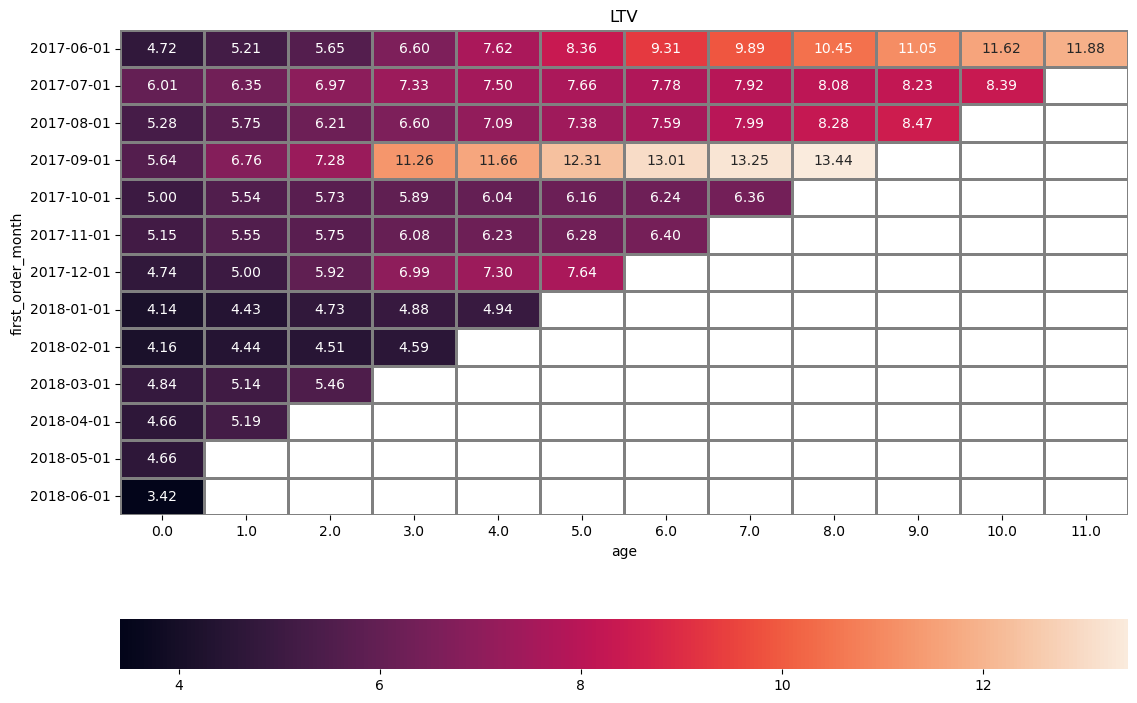

In [71]:
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
plt.figure(figsize=(13,9))
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.show()

According to data, the September cohort is the most profitable. The second place occupies the June cohort.

## Marketing

Our next step is to find how much money was spent? Overall, per source and over time.

In [72]:
marketing=costs.sort_values(by=['dt','source_id'])
marketing.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
363,2,2017-06-01,132.56
726,3,2017-06-01,349.38
1089,4,2017-06-01,76.74
1452,5,2017-06-01,73.24


In [73]:
print('Total marketing cost is {}'.format(marketing['costs'].sum()))

Total marketing cost is 329131.62


In [74]:
#Costs per source
marketing_per_source=marketing.groupby(['source_id'])['costs'].sum().reset_index()
marketing_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


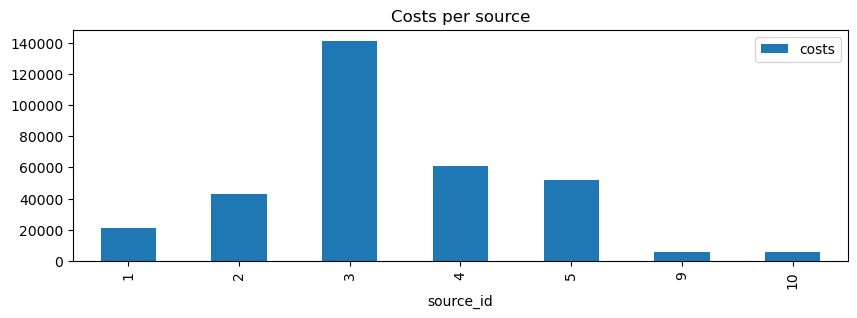

In [75]:
#plotting costs per source
marketing_per_source.plot(x="source_id", y="costs", title='Costs per source',figsize=(10,3), kind='bar')
plt.show()

In [76]:
marketing['dt_month']=marketing['dt'].astype('datetime64[M]')

In [77]:
costs_per_time=marketing.groupby(['dt_month'])['costs'].sum().reset_index()
costs_per_time

,dt_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


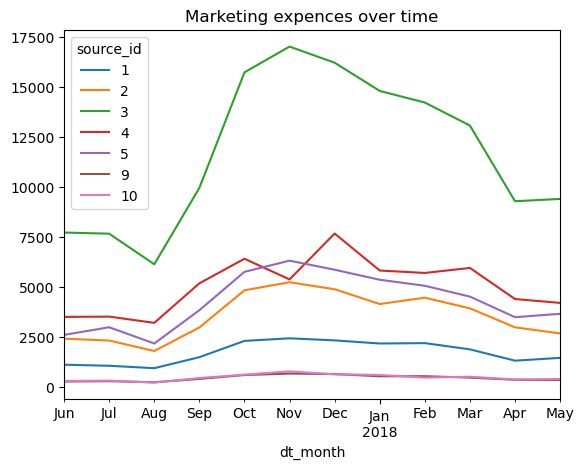

In [123]:
marketing.pivot_table(index = 'dt_month', columns = 'source_id', values = 'costs', aggfunc = 'sum').plot(title='Marketing expences over time');

   It was spent 329132 on marketing from June 2017 till May 2018. The most amount of money was spent on the 3rd source. The biggest expenses on marketing were in the period from November till February. People attend events and shows in autumn and winter more often so advertisements tend to be more profitable. There is lowest marketing expenses in August because of the vacation season.

Let's check how much did customer acquisition per month costs.

In [81]:
marketing['cost_month']=marketing['dt'].astype('datetime64[M]')

In [82]:
marketing_by_month=marketing.groupby(['cost_month'])['costs'].sum().reset_index()
marketing_by_month

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [83]:
buyers_per_month=purchase_new.groupby(['first_order_month'])['Uid'].nunique().reset_index()
buyers_per_month.columns=['cost_month','buyers']
buyers_per_month

,cost_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [84]:
CAC_per_month=marketing_by_month.merge(buyers_per_month,how='left',on=['cost_month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month

,cost_month,costs,buyers,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327
5,2017-11-01,37907.88,4081,9.288870
6,2017-12-01,38315.35,4383,8.741809
7,2018-01-01,33518.52,3373,9.937302
8,2018-02-01,32723.03,3651,8.962758
9,2018-03-01,30415.27,3533,8.608907


In [85]:
CAC_per_month_group=CAC_per_month.groupby('cost_month')['CAC'].median().reset_index()
CAC_per_month_group

,cost_month,CAC
0,2017-06-01,8.905091
1,2017-07-01,9.485486
2,2017-08-01,10.796015
3,2017-09-01,9.441654
4,2017-10-01,8.369327
5,2017-11-01,9.288870
6,2017-12-01,8.741809
7,2018-01-01,9.937302
8,2018-02-01,8.962758
9,2018-03-01,8.608907


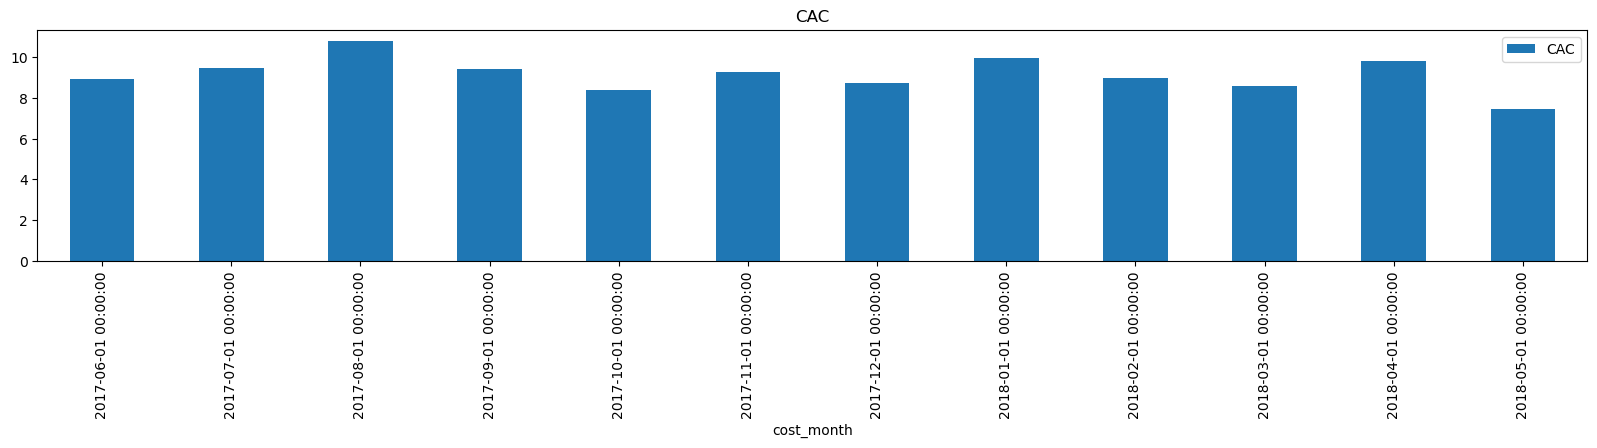

In [86]:
CAC_per_month_group.plot(x='cost_month', y='CAC', title='CAC',figsize=(20,3), kind='bar')
plt.show()



Average customer acquisition cost is a little bit higher in August,January and April.

And what about CAC per source?  

In [87]:
#CAC per source
calc_source=marketing.groupby(['cost_month','source_id'])['costs'].sum().reset_index()

calc_source

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [88]:
visits['first_session_month']=visits['first_session'].astype('datetime64[M]')

In [89]:
vis_sor=visits[['source_id', 'first_session_month','Uid']]
vis_sor.columns=('source_id', 'month_we_need', 'Uid')
vis_sor

,source_id,month_we_need,Uid
0,4,2017-12-01,16879256277535980062
1,2,2018-02-01,104060357244891740
2,5,2017-07-01,7459035603376831527
3,9,2018-03-01,16174680259334210214
4,4,2018-03-01,16174680259334210214
...,...,...,...
359393,10,2018-04-01,12734910664455613822
359394,4,2017-11-01,6761309174945977743
359395,3,2017-07-01,11102751930812818282
359396,4,2018-03-01,272012551460639309


In [90]:
vis_sor.duplicated().sum()

81528

In [91]:
vis_sor.drop_duplicates()

,source_id,month_we_need,Uid
0,4,2017-12-01,16879256277535980062
1,2,2018-02-01,104060357244891740
2,5,2017-07-01,7459035603376831527
3,9,2018-03-01,16174680259334210214
4,4,2018-03-01,16174680259334210214
...,...,...,...
359393,10,2018-04-01,12734910664455613822
359394,4,2017-11-01,6761309174945977743
359395,3,2017-07-01,11102751930812818282
359396,4,2018-03-01,272012551460639309


In [92]:
visits['first_session_month']=visits['first_session'].astype('datetime64[M]')

In [93]:
purchase_3=purchase_new[['Uid','first_purchase_month']]
purchase_3.columns=('Uid','month_we_need')
purchase_3

,Uid,month_we_need
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,1575281904278712,2017-06-01
3,2429014661409475,2017-10-01
4,2464366381792757,2018-01-01
...,...,...
50410,18445407535914413204,2017-09-01
50411,18445407535914413204,2017-09-01
50412,18445601152732270159,2018-03-01
50413,18446156210226471712,2018-02-01


In [94]:
purchase_3.duplicated().sum()

13892

In [95]:
purchase_3.drop_duplicates()

,Uid,month_we_need
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
3,2429014661409475,2017-10-01
4,2464366381792757,2018-01-01
5,2551852515556206,2017-11-01
...,...,...
50408,18445147675727495770,2017-11-01
50409,18445407535914413204,2017-09-01
50412,18445601152732270159,2018-03-01
50413,18446156210226471712,2018-02-01


In [96]:
calc_buyers_cource=vis_sor.merge(purchase_3, how='inner', on=["Uid", "month_we_need"])
calc_buyers_cource

,source_id,month_we_need,Uid
0,9,2018-03-01,16174680259334210214
1,4,2018-03-01,16174680259334210214
2,5,2017-09-01,16007536194108375387
3,5,2017-09-01,16007536194108375387
4,5,2017-09-01,16007536194108375387
...,...,...,...
601284,3,2017-12-01,6752020629696526518
601285,4,2017-11-01,11750532881998794555
601286,4,2017-11-01,11202626539189016002
601287,10,2018-04-01,12734910664455613822


In [97]:
calc_buyers_cource.duplicated().sum()

558119

In [98]:
calc_buyers_cource.drop_duplicates()

,source_id,month_we_need,Uid
0,9,2018-03-01,16174680259334210214
1,4,2018-03-01,16174680259334210214
2,5,2017-09-01,16007536194108375387
5,3,2017-09-01,16007536194108375387
8,4,2017-09-01,16007536194108375387
...,...,...,...
601284,3,2017-12-01,6752020629696526518
601285,4,2017-11-01,11750532881998794555
601286,4,2017-11-01,11202626539189016002
601287,10,2018-04-01,12734910664455613822


In [99]:
buyers_source=calc_buyers_cource.groupby(['month_we_need', 'source_id'])['Uid'].nunique().reset_index()
buyers_source.columns=('cost_month', 'source_id','buyers')
buyers_source

,cost_month,source_id,buyers
0,2017-06-01,1,401
1,2017-06-01,2,457
2,2017-06-01,3,874
3,2017-06-01,4,644
4,2017-06-01,5,571
...,...,...,...
80,2018-05-01,3,683
81,2018-05-01,4,681
82,2018-05-01,5,499
83,2018-05-01,9,40


In [100]:
source_final=calc_source.merge(buyers_source, how='inner', on=["cost_month","source_id"])
source_final

,cost_month,source_id,costs,buyers
0,2017-06-01,1,1125.61,401
1,2017-06-01,2,2427.38,457
2,2017-06-01,3,7731.65,874
3,2017-06-01,4,3514.80,644
4,2017-06-01,5,2616.12,571
...,...,...,...,...
79,2018-05-01,3,9411.42,683
80,2018-05-01,4,4214.21,681
81,2018-05-01,5,3669.56,499
82,2018-05-01,9,362.17,40


In [101]:
source_final['cac']=source_final['costs']/source_final['buyers']
source_final

,cost_month,source_id,costs,buyers,cac
0,2017-06-01,1,1125.61,401,2.807007
1,2017-06-01,2,2427.38,457,5.311554
2,2017-06-01,3,7731.65,874,8.846281
3,2017-06-01,4,3514.80,644,5.457764
4,2017-06-01,5,2616.12,571,4.581646
...,...,...,...,...,...
79,2018-05-01,3,9411.42,683,13.779531
80,2018-05-01,4,4214.21,681,6.188267
81,2018-05-01,5,3669.56,499,7.353828
82,2018-05-01,9,362.17,40,9.054250


In [102]:
CAC_per_source=source_final.groupby(['source_id'])['cac'].mean()
CAC_per_source

source_id
1      3.980648
2      8.505261
3     13.593246
4      5.903339
5      6.545427
9      4.123187
10     4.532143
Name: cac, dtype: float64

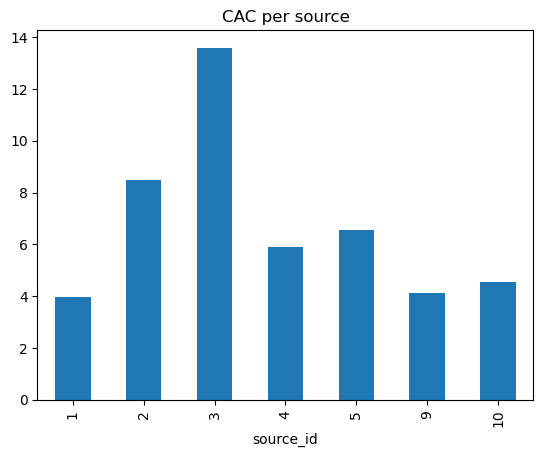

In [103]:
CAC_per_source.plot(x='source_id', y='CAC', title='CAC per source', kind='bar')
plt.show()

The highest customer acquisition cost has 3rd source, the lowest-1st.

In [104]:
#CAC per device
visits_for_device=visits[['Device','first_session_month','Uid']]
visits_for_device.columns=('Device','cost_month','Uid')
visits_for_device

,Device,cost_month,Uid
0,touch,2017-12-01,16879256277535980062
1,desktop,2018-02-01,104060357244891740
2,touch,2017-07-01,7459035603376831527
3,desktop,2018-03-01,16174680259334210214
4,desktop,2018-03-01,16174680259334210214
...,...,...,...
359393,desktop,2018-04-01,12734910664455613822
359394,desktop,2017-11-01,6761309174945977743
359395,desktop,2017-07-01,11102751930812818282
359396,desktop,2018-03-01,272012551460639309


In [105]:
merge_for_device=visits_for_device.merge(CAC_per_month, how='inner', on='cost_month')
merge_for_device

,Device,cost_month,Uid,costs,buyers,CAC
0,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809
1,desktop,2017-12-01,9969694820036681168,38315.35,4383,8.741809
2,touch,2017-12-01,11451610027598174149,38315.35,4383,8.741809
3,desktop,2017-12-01,11451610027598174149,38315.35,4383,8.741809
4,desktop,2017-12-01,11451610027598174149,38315.35,4383,8.741809
...,...,...,...,...,...,...
359393,desktop,2017-08-01,7939338551566524976,14790.54,1370,10.796015
359394,desktop,2017-08-01,1574381429150211565,14790.54,1370,10.796015
359395,desktop,2017-08-01,16741657757032424375,14790.54,1370,10.796015
359396,desktop,2017-08-01,17772445755107552872,14790.54,1370,10.796015


In [106]:
cac_per_device=merge_for_device.groupby('Device')['CAC'].mean().reset_index()
cac_per_device

,Device,CAC
0,desktop,9.111083
1,touch,9.089338


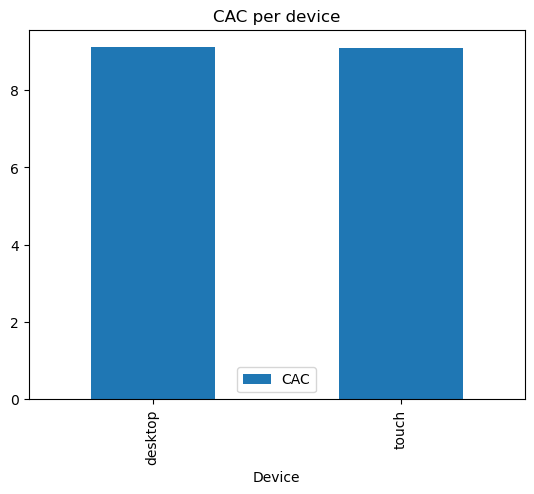

In [107]:
cac_per_device.plot(x='Device', y='CAC', title='CAC per device', kind='bar')
plt.show()

Customer acquisition cost is almost the same for users with different devices.

It is time to check how worthwhile where the investments? (ROI)

In [109]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.groupby('month').agg({'costs' : 'sum'}).reset_index()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [110]:
#ROI per month
CAC_per_month_ROI=CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

,first_order_month,month,Revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531,8.905091


In [111]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2)
ROI

,first_order_month,month,Revenue,cohort_size,age,ltv,CAC,ROI
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,8.905091,0.530530
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,8.905091,0.054500
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,8.905091,0.049145
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,8.905091,0.107205
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531,8.905091,0.114825
...,...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2.0,0.315559,8.608907,0.036655
75,2018-04-01,2018-04-01,10600.69,2276,0.0,4.657597,9.793225,0.475594
76,2018-04-01,2018-05-01,1209.92,2276,1.0,0.531599,9.793225,0.054282
77,2018-05-01,2018-05-01,13925.76,2988,0.0,4.660562,7.437841,0.626601


The best return on investment are from June 2017 and September 2017 cohorts.

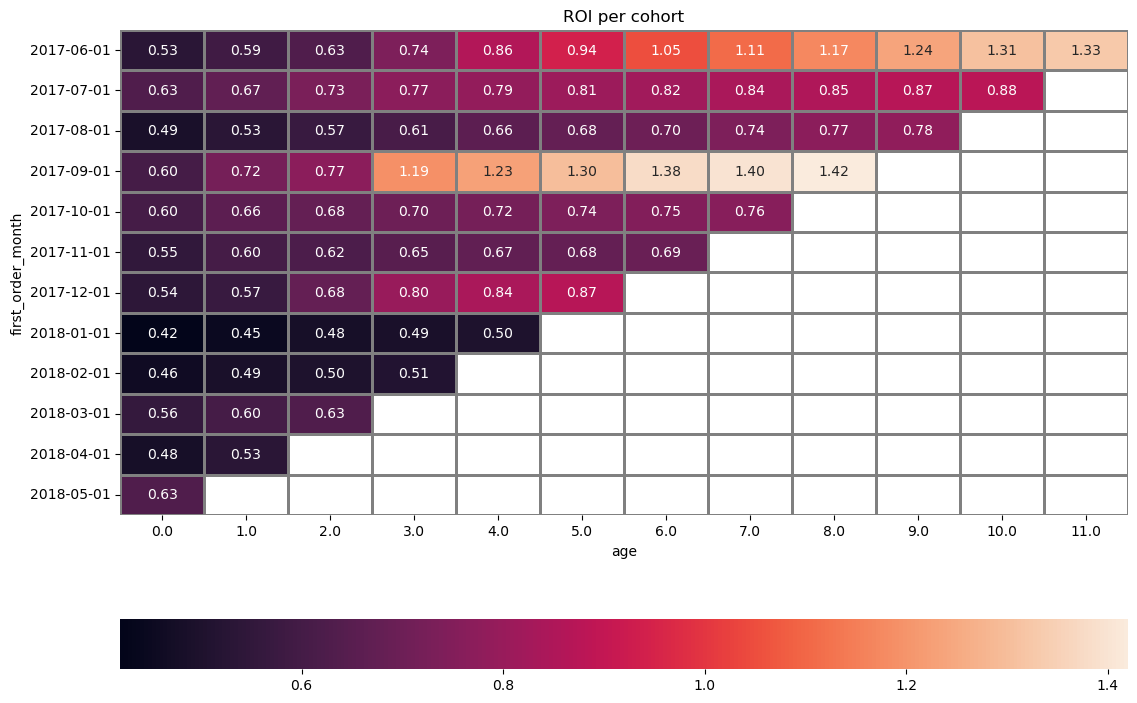

In [112]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(13,9))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} ).set(title ='ROI per cohort')
plt.show()

In [113]:
#ROI per source
ltv_cohort.columns=('cost_month', 'month', 'Revenue', 'cohort_size', 'age', 'ltv')

In [114]:
merge_ROI_source=source_final.merge(ltv_cohort, how='left', on='cost_month')
merge_ROI_source

,cost_month,source_id,costs,buyers,cac,month,Revenue,cohort_size,age,ltv
0,2017-06-01,1,1125.61,401,2.807007,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,1,1125.61,401,2.807007,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,1,1125.61,401,2.807007,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,1,1125.61,401,2.807007,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,1,1125.61,401,2.807007,2017-10-01,2068.58,2023,4.0,1.022531
...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,3,9411.42,683,13.779531,2018-05-01,13925.76,2988,0.0,4.660562
542,2018-05-01,4,4214.21,681,6.188267,2018-05-01,13925.76,2988,0.0,4.660562
543,2018-05-01,5,3669.56,499,7.353828,2018-05-01,13925.76,2988,0.0,4.660562
544,2018-05-01,9,362.17,40,9.054250,2018-05-01,13925.76,2988,0.0,4.660562


In [115]:
merge_ROI_source['ROI']=merge_ROI_source['ltv']/merge_ROI_source['cac']
merge_ROI_source

,cost_month,source_id,costs,buyers,cac,month,Revenue,cohort_size,age,ltv,ROI
0,2017-06-01,1,1125.61,401,2.807007,2017-06-01,9557.49,2023,0.0,4.724414,1.683079
1,2017-06-01,1,1125.61,401,2.807007,2017-07-01,981.82,2023,1.0,0.485329,0.172899
2,2017-06-01,1,1125.61,401,2.807007,2017-08-01,885.34,2023,2.0,0.437637,0.155909
3,2017-06-01,1,1125.61,401,2.807007,2017-09-01,1931.30,2023,3.0,0.954671,0.340103
4,2017-06-01,1,1125.61,401,2.807007,2017-10-01,2068.58,2023,4.0,1.022531,0.364278
...,...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,3,9411.42,683,13.779531,2018-05-01,13925.76,2988,0.0,4.660562,0.338224
542,2018-05-01,4,4214.21,681,6.188267,2018-05-01,13925.76,2988,0.0,4.660562,0.753129
543,2018-05-01,5,3669.56,499,7.353828,2018-05-01,13925.76,2988,0.0,4.660562,0.633760
544,2018-05-01,9,362.17,40,9.054250,2018-05-01,13925.76,2988,0.0,4.660562,0.514738


In [116]:
ROI_source=merge_ROI_source.groupby('source_id')['ROI'].sum().reset_index()
ROI_source

,source_id,ROI
0,1,23.655770
1,2,11.440957
2,3,6.970844
3,4,15.078373
4,5,14.689500
5,9,33.462153
6,10,21.704942


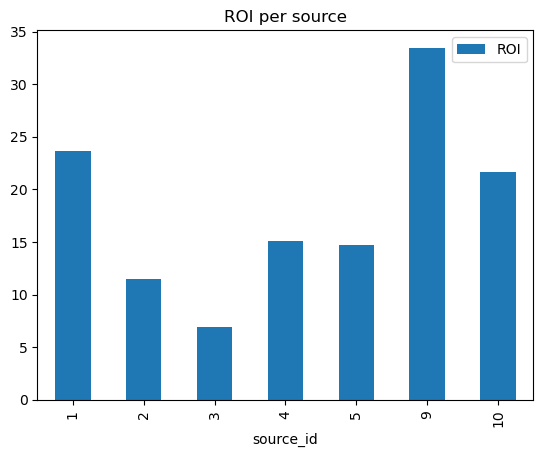

In [124]:
ROI_source.plot(x='source_id', y='ROI', title='ROI per source', kind='bar');

The highest return on investment we have from the 9th source, the lowest from the 3rd.

In [118]:
#ROI per device
merge_for_roi_per_device=merge_for_device.merge(ltv_cohort, how='left', on='cost_month')
merge_for_roi_per_device

,Device,cost_month,Uid,costs,buyers,CAC,month,Revenue,cohort_size,age,ltv
0,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2017-12-01,20767.49,4383,0.0,4.738191
1,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2018-01-01,1141.22,4383,1.0,0.260374
2,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2018-02-01,4054.70,4383,2.0,0.925097
3,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2018-03-01,4669.10,4383,3.0,1.065275
4,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2018-04-01,1371.57,4383,4.0,0.312930
...,...,...,...,...,...,...,...,...,...,...,...
2484290,desktop,2017-08-01,10846615278705158802,14790.54,1370,10.796015,2018-01-01,388.45,1370,5.0,0.283540
2484291,desktop,2017-08-01,10846615278705158802,14790.54,1370,10.796015,2018-02-01,288.61,1370,6.0,0.210664
2484292,desktop,2017-08-01,10846615278705158802,14790.54,1370,10.796015,2018-03-01,554.86,1370,7.0,0.405007
2484293,desktop,2017-08-01,10846615278705158802,14790.54,1370,10.796015,2018-04-01,400.33,1370,8.0,0.292212


In [119]:
merge_for_roi_per_device['ROI']=merge_for_roi_per_device['ltv']/merge_for_roi_per_device['CAC']
merge_for_roi_per_device

,Device,cost_month,Uid,costs,buyers,CAC,month,Revenue,cohort_size,age,ltv,ROI
0,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2017-12-01,20767.49,4383,0.0,4.738191,0.542015
1,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2018-01-01,1141.22,4383,1.0,0.260374,0.029785
2,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2018-02-01,4054.70,4383,2.0,0.925097,0.105824
3,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2018-03-01,4669.10,4383,3.0,1.065275,0.121860
4,touch,2017-12-01,16879256277535980062,38315.35,4383,8.741809,2018-04-01,1371.57,4383,4.0,0.312930,0.035797
...,...,...,...,...,...,...,...,...,...,...,...,...
2484290,desktop,2017-08-01,10846615278705158802,14790.54,1370,10.796015,2018-01-01,388.45,1370,5.0,0.283540,0.026263
2484291,desktop,2017-08-01,10846615278705158802,14790.54,1370,10.796015,2018-02-01,288.61,1370,6.0,0.210664,0.019513
2484292,desktop,2017-08-01,10846615278705158802,14790.54,1370,10.796015,2018-03-01,554.86,1370,7.0,0.405007,0.037515
2484293,desktop,2017-08-01,10846615278705158802,14790.54,1370,10.796015,2018-04-01,400.33,1370,8.0,0.292212,0.027067


In [120]:
ROI_device=merge_for_roi_per_device.groupby(['Device'])['ROI'].median()
ROI_device

Device
desktop    0.038670
touch      0.036243
Name: ROI, dtype: float64

<AxesSubplot:title={'center':'ROI per device'}, xlabel='Device'>

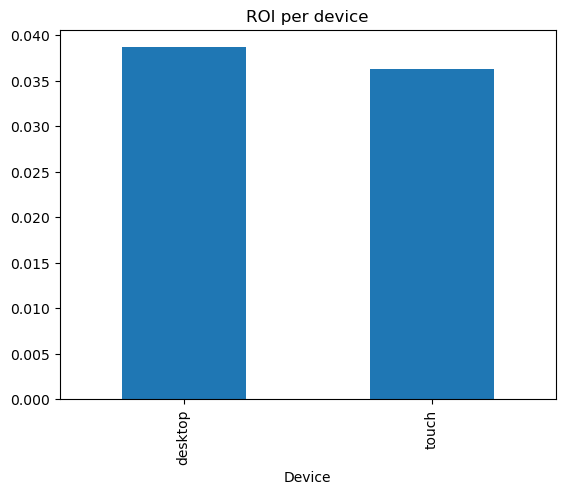

In [121]:
ROI_device.plot(x='Device', y='ROI', title='ROI per device', kind='bar');

There is no signiaicant difference in ROI between various devices 

## Conclusion
   We have done a lot of work on Yandex.Afisha's customer and marketing analysis. There were 3 datasets that contain information about visits, orders and marketing costs with no missing values, with wrong datatypes in some columns and column with the same information but with different spelling in datasets. Everything was fixed for our future analysis.
    
   Calculation of DAU,WAU,MAU and session per day metrics gives us information that in average users do 1 session per day. Only 10% users do more sessions than 1.  The users are more active from September till March.
    
  The average length of visit is 5 minutes. The majority of users spent 2-14 minutes per session.
    
  Retention rate is decreasing. The users from the eldest cohorts are more loyal than users from youngest cohorts. It's also true for their age distribution.
    
  The average client of Yandex.Afisha buys something on the web site on the day of registration. It takes 2 days to make a purchase for 75% of users.
   
  Conversion of the site is 16%. 
   
  The main part of clients spend 1.3-4.9% for one purchase. There are extremely high purchases, so we prefer to use the median for calculating the average check which is 2.4$.
   
   September cohort has the higest LTV. The second place occupies the June cohort.
    
   It was spent 329132 on marketing from June 2017 till May 2018. The most amount of money was spent on the 3rd source. The biggest expenses on marketing were in the period from November till February. People attend events and shows in autumn and winter more often so advertisements tend to be more profitable. There is lowest marketing expences in August because of vocation season.
    
   Average customer acquisition cost is a little bit higher in August,January and April
    
   The highest customer acquisition cost has the 3rd source, the lowest- the 1st.
   
   The best return on investment are from June 2017 and September 2017 cohorts.
   
   The highest return on investment we have from the 9th source, the lowest from the 3rd.
    
   There is no sicniaicant difference in ROI between various devices 
    
   Since we have the best results according all metrics from September till March, we should focuse on this period of time. And change our marketing policy during other time.

   The 3rd source shoud be excluded because it is unprofitable.